In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:

import numpy as np
import pandas as pd

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
from scipy import stats

# We will use the Seaborn library
import seaborn as sns
sns.set()

#precisao de casas decimais
pd.set_option("display.precision", 3)
#maximo de colunas
pd.set_option("display.max_columns", 200)
#maximo de linhas
pd.set_option("display.max_rows", 2000)

In [17]:
df = pd.read_csv('./incident_event_log.csv', low_memory=False)

In [18]:
#ajustando notify
df['notify'] = df['notify'].map({'Do Not Notify': False, 'Send Email': True})

In [19]:
#ajustando datas
df['opened_at']      = pd.to_datetime(df['opened_at'])
df['sys_created_at'] = pd.to_datetime(df['sys_created_at'])
df['sys_updated_at'] = pd.to_datetime(df['sys_updated_at'])
df['resolved_at']    = pd.to_datetime(df['resolved_at'])
df['closed_at']      = pd.to_datetime(df['closed_at'])

In [20]:
#ajustando categorias
df['location'] = df['location'].str.lstrip('Location ').astype('float')
df['category'] = df['category'].str.lstrip('Category ').astype('float')
df['subcategory'] = df['subcategory'].str.lstrip('Subcategory ').astype('float')
df['u_symptom'] = df['u_symptom'].str.lstrip('Symptom ').astype('float')
df['closed_code'] = df['closed_code'].str.lstrip('code ').astype('float')
df['problem_id'] = df['problem_id'].str.lstrip('Problem ID ').astype('float')

In [21]:
#ajustando impacto
df['impact'] = df['impact'].str.partition('-')[0].astype('float')
df['urgency'] = df['urgency'].str.partition('-')[0].astype('float')
df['priority'] = df['priority'].str.partition('-')[0].astype('float')

In [22]:
#ajustando id pessoas
df['resolved_by'] = df['resolved_by'].str.lstrip('Resolved by ').astype('float')
df['assignment_group'] = df['assignment_group'].str.lstrip('Group ').astype('float')
df['assigned_to'] = df['assigned_to'].str.lstrip('Resolver ').astype('float')
df['sys_updated_by'] = df['sys_updated_by'].str.lstrip('Updated by ').astype('float')
df['sys_created_by'] = df['sys_created_by'].str.lstrip('Created by ').astype('float')
df['opened_by'] = df['opened_by'].str.lstrip('Opened by ').astype('float')
df['caller_id'] = df['caller_id'].str.lstrip('Caller ').astype('float')

In [23]:
#diferença entre abertura e fechamento 
df['days_to_close'] = df['closed_at'] - df['opened_at']
df['days_to_resolve'] = df['resolved_at'] - df['opened_at']
df['num_days_to_close'] = df['days_to_close'] / pd.Timedelta(1, 'D')
df['num_days_to_resolve'] = df['days_to_resolve'] / pd.Timedelta(1, 'D')

In [24]:
df.head(200)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,days_to_close,days_to_resolve,num_days_to_close,num_days_to_resolve
0,INC0000045,New,True,0,0,0,True,2403.0,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00,21.0,2016-02-29 01:23:00,Phone,143.0,55.0,170.0,72.0,NaN,2.0,2.0,3.0,56.0,NaN,True,False,False,NaN,NaN,NaN,NaN,5.0,149.0,2016-02-29 11:29:00,2016-05-03 12:00:00,64 days 10:44:00,0 days 10:13:00,64.447,0.426
1,INC0000045,Resolved,True,0,0,2,True,2403.0,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00,642.0,2016-02-29 08:53:00,Phone,143.0,55.0,170.0,72.0,NaN,2.0,2.0,3.0,56.0,NaN,True,False,False,NaN,NaN,NaN,NaN,5.0,149.0,2016-02-29 11:29:00,2016-05-03 12:00:00,64 days 10:44:00,0 days 10:13:00,64.447,0.426
2,INC0000045,Resolved,True,0,0,3,True,2403.0,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00,804.0,2016-02-29 11:29:00,Phone,143.0,55.0,170.0,72.0,NaN,2.0,2.0,3.0,56.0,NaN,True,False,False,NaN,NaN,NaN,NaN,5.0,149.0,2016-02-29 11:29:00,2016-05-03 12:00:00,64 days 10:44:00,0 days 10:13:00,64.447,0.426
3,INC0000045,Closed,False,0,0,4,True,2403.0,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00,908.0,2016-05-03 12:00:00,Phone,143.0,55.0,170.0,72.0,NaN,2.0,2.0,3.0,56.0,NaN,True,False,False,NaN,NaN,NaN,NaN,5.0,149.0,2016-02-29 11:29:00,2016-05-03 12:00:00,64 days 10:44:00,0 days 10:13:00,64.447,0.426
4,INC0000047,New,True,0,0,0,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,746.0,2016-02-29 04:57:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,70.0,89.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783
5,INC0000047,Active,True,1,0,1,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,21.0,2016-02-29 05:30:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,24.0,31.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783
6,INC0000047,Active,True,1,0,2,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,21.0,2016-02-29 05:33:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,24.0,31.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783
7,INC0000047,Active,True,1,0,3,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,804.0,2016-02-29 11:31:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,24.0,31.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783
8,INC0000047,Active,True,1,0,4,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,703.0,2016-02-29 11:32:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,24.0,31.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783
9,INC0000047,Active,True,1,0,5,True,2403.0,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00,332.0,2016-01-03 09:14:00,Phone,165.0,40.0,215.0,471.0,NaN,2.0,2.0,3.0,24.0,31.0,True,False,False,NaN,NaN,NaN,NaN,5.0,81.0,2016-01-03 09:52:00,2016-06-03 10:00:00,95 days 05:20:00,-57 days +05:12:00,95.222,-56.783


In [25]:
#tipos de abertura
df[df['sys_mod_count'] == 0].groupby(by='incident_state').size()

incident_state
Active                 6502
Awaiting Problem          6
Awaiting User Info      193
New                   16393
Resolved               1819
dtype: int64

In [26]:
#tipos de abertura 
df[df['sys_mod_count'] != 0].groupby(by='incident_state').size()

incident_state
-100                      5
Active                32214
Awaiting Evidence        38
Awaiting Problem        455
Awaiting User Info    14449
Awaiting Vendor         707
Closed                24985
New                   20014
Resolved              23932
dtype: int64

In [27]:
#Porcentagem de chamados que foram rejeitados, erc mto pequeno n vai impactar na media de dias para finalizar um chamado 

df[df['reopen_count'] > 0].groupby('number').size().sum() / df.groupby('number').size().sum()

0.016328892401490346

In [28]:
#Quantidade de analistas ----- sem ctz 
len(df.groupby('sys_updated_by'))

846

In [29]:
df_maxMin = df[(df['num_days_to_close'] != df['num_days_to_close'].max()) & (df['num_days_to_close'] != df['num_days_to_close'].min())]

print(df_maxMin.groupby('priority')['num_days_to_close'].agg(['mean', 'median','max', 'min']))
print(df.groupby('priority')['num_days_to_close'].agg(['mean', 'median','max', 'min']))


#print(closed_df['num_days_to_close'].quantile(0.9))
#print(closed_df['num_days_to_close'].quantile(0.8))
#print(closed_df['num_days_to_close'].quantile(0.75))


            mean  median      max      min
priority                                  
1.0       14.086   7.076  335.759 -257.294
2.0       17.593   6.102  318.054 -228.110
3.0        6.647   6.009  555.626 -334.425
4.0       19.944   8.435  484.868 -230.837
            mean  median      max      min
priority                                  
1.0       15.391   7.076  603.638 -257.294
2.0       17.593   6.102  318.054 -228.110
3.0        6.657   6.009  603.638 -334.426
4.0       19.944   8.435  484.868 -230.837


In [30]:
#df.groupby('priority')['num_days_to_close'].quantile(0.9)
#df_maxMin.max()

In [31]:
#verificamos que possuem mais chamados fechados que chamados abertos

#len(pd.unique(df[df['sys_mod_count'] == 0]['number']))

df[df['sys_mod_count'] == 0].groupby(by='incident_state').size().sum() - len(df[df['incident_state'] == 'Closed'])

-72

In [32]:
#quantia de chamados com datas inválidas
print (len(df[df['num_days_to_close'] < 0]))
print (len(df[df['num_days_to_resolve'] < 0]))

50484
25999


In [33]:
#quantia de chamados que iniciam com alterações
df[((df['sys_mod_count'] != 0) & (df['sys_created_at'] == df['sys_updated_at']))].groupby(by='number').size()

number
INC0000086    1
INC0000193    1
INC0000259    1
INC0000378    1
INC0000510    1
             ..
INC0105551    1
INC0106713    1
INC0107571    1
INC0111152    1
INC0113256    1
Length: 2198, dtype: int64

In [34]:
#remover qualquer chamado com periodo para fechamento negativo
df = df[((df['num_days_to_close'] > 0) & (df['num_days_to_resolve'] > 0))]

In [35]:
#chamados fechados - mostrando que o ciclo de abertura e fechamento está incompleto
closed_df = df[df['incident_state'] == 'Closed']

In [36]:
#avaliação do período que levou para fechar os tickets.
closed_df['days_to_close'].describe()

count                      14336
mean     66 days 11:53:36.813616
std      79 days 18:33:07.450753
min              0 days 00:02:00
25%              5 days 03:00:45
50%             12 days 02:31:30
75%            153 days 00:19:00
max            603 days 15:19:00
Name: days_to_close, dtype: object

In [37]:
#avaliação do período que levou para resolver os tickets.
closed_df['days_to_resolve'].describe()

count                      14336
mean     24 days 20:44:05.938895
std      55 days 10:48:12.069951
min              0 days 00:01:00
25%              0 days 00:19:00
50%              0 days 07:06:00
75%             16 days 01:18:45
max            534 days 20:35:00
Name: days_to_resolve, dtype: object

In [38]:
category_df = closed_df.groupby(by=['category', 'subcategory'])
category_df.size()

category  subcategory
2.0       45.0              5
4.0       282.0             1
5.0       177.0            10
6.0       87.0              1
7.0       86.0              7
          164.0             1
          174.0            10
8.0       156.0             5
          174.0             5
          281.0            17
          291.0             2
9.0       52.0              2
          74.0              4
          110.0            20
          145.0            28
          164.0           266
          174.0           254
          198.0             3
          202.0            43
          204.0             2
10.0      158.0             1
          177.0             1
12.0      165.0             1
13.0      69.0             16
          174.0            10
          209.0             4
          302.0            38
14.0      71.0              1
17.0      12.0              2
          90.0             14
          99.0              5
          174.0            32
19.0      4.0     

In [39]:
#chamados mais recorrentes
category_df.size().sort_values(ascending=False).head(10)

category  subcategory
42.0      223.0          1658
26.0      175.0          1057
53.0      174.0           826
32.0      9.0             486
46.0      223.0           452
37.0      135.0           334
23.0      174.0           332
51.0      174.0           316
26.0      174.0           314
          275.0           305
dtype: int64

In [40]:
category_df['days_to_close'].describe()

count                     mean                      std  \
category subcategory                                                           
2.0      45.0            5        123 days 03:24:12  65 days 23:52:27.831567   
4.0      282.0           1        181 days 08:47:00                      NaT   
5.0      177.0          10        122 days 00:37:06  61 days 16:04:11.262652   
6.0      87.0            1        103 days 14:42:00                      NaT   
7.0      86.0            7  56 days 11:30:34.285714  65 days 17:43:45.719670   
         164.0           1          7 days 15:15:00                      NaT   
         174.0          10         54 days 17:06:06  82 days 10:08:48.493108   
8.0      156.0           5        130 days 19:03:00  76 days 10:40:39.291625   
         174.0           5         35 days 19:52:12  64 days 14:00:46.461483   
         281.0          17 104 days 12:48:45.882352  92 days 12:38:51.538101   
         291.0           2        106 days 16:55:00 150 days 12:39:20.467922   
9.0      52.0            2         94 days 02:04:00 124 days 15:06:31.769536   
         74.0            4         95 days 06:09:00  89 days 09:43:27.286794   
         110.0          20         68 days 09:21:27  84 days 00:35:13.590117   
         145.0          28         89 days 11:42:15  87 days 21:30:51.593385   
         164.0         266  81 days 05:45:22.105263  81 days 06:53:07.186115   
         174.0         254  60 days 20:56:23.858267  75 days 21:58:58.073410   
         198.0           3         67 days 04:41:20 101 days 09:55:37.408212   
         202.0          43  68 days 03:58:26.511627  75 days 03:43:33.964427   
         204.0           2        152 days 03:57:00   1 days 14:32:14.350468   
10.0     158.0           1          6 days 22:25:00                      NaT   
         177.0           1        127 days 19:05:00                      NaT   
12.0     165.0           1          7 days 05:34:00                      NaT   
13.0     69.0           16         42 days 08:17:15  71 days 06:35:19.569706   
         174.0          10         46 days 18:49:36  82 days 15:20:39.695867   
         209.0           4         80 days 20:27:45  83 days 13:08:50.470511   
         302.0          38  81 days 12:15:14.210526  90 days 02:24:34.659853   
14.0     71.0            1         65 days 16:06:00                      NaT   
17.0     12.0            2        198 days 07:51:00  20 days 13:08:10.569118   
         90.0           14         75 days 06:29:30  88 days 04:40:30.405902   
         99.0            5         58 days 21:27:48  70 days 21:12:19.789734   
         174.0          32  63 days 11:14:18.750000  84 days 03:10:26.120732   
19.0     4.0             8 109 days 05:27:07.500000 108 days 00:00:11.181454   
         163.0          86  64 days 12:10:39.069767  83 days 07:09:22.754077   
         174.0          23  29 days 12:43:05.217391  54 days 03:29:46.420558   
         289.0          38 107 days 08:10:26.842105  73 days 13:51:02.762013   
20.0     89.0           14  56 days 13:07:34.285714  74 days 23:48:24.035818   
         103.0         178  69 days 03:25:38.764044  84 days 23:00:12.850572   
         125.0         200  70 days 04:55:13.800000  82 days 09:39:22.994375   
         174.0         194  60 days 20:10:27.216494  80 days 01:50:22.400139   
21.0     104.0           1          6 days 21:00:00                      NaT   
         126.0           3        163 days 15:43:20 135 days 15:27:13.638864   
         177.0           3        125 days 16:08:00 104 days 11:39:00.405758   
22.0     2.0             1         10 days 00:01:00                      NaT   
         40.0            5         73 days 14:33:48  32 days 10:27:50.636192   
         174.0           1         14 days 05:28:00                      NaT   
         277.0          16  69 days 14:11:18.750000  89 days 01:17:59.411772   
         292.0           3         96 days 16:17:00  60 days 22:58:17.364686   
23.0     3.0         

In [41]:
#selecionando colunas que se repetem nas linhas referentes ao mesmo incidente
common_columns = np.array(['number', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'contact_type', 'notify', 'closed_code', 'resolved_at', 'closed_at'])
#agrupando em um novo df
grouped_df = df.groupby(by=list(common_columns))

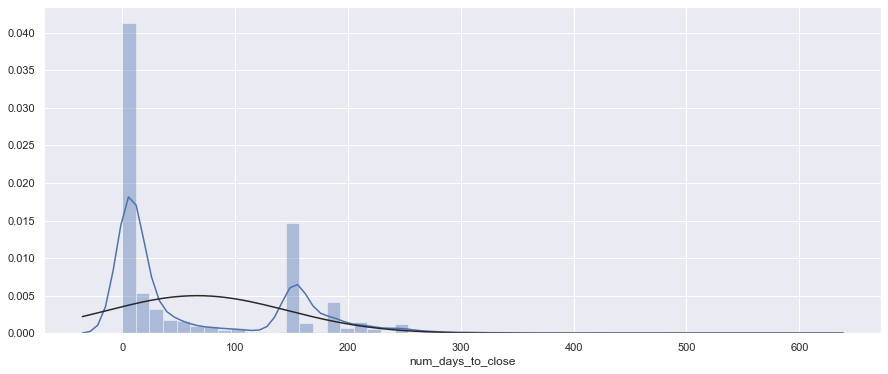

In [42]:
plt.figure(figsize=(15,6))
_ = sns.distplot(closed_df['num_days_to_close'], fit=stats.norm)

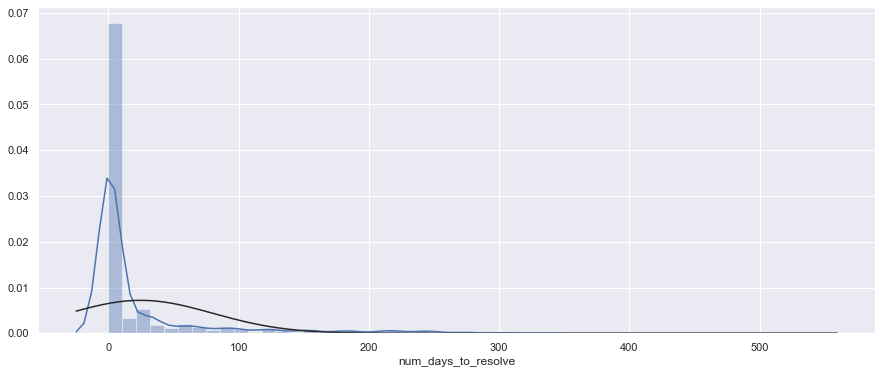

In [43]:
plt.figure(figsize=(15,6))
_ = sns.distplot(closed_df['num_days_to_resolve'], fit=stats.norm)

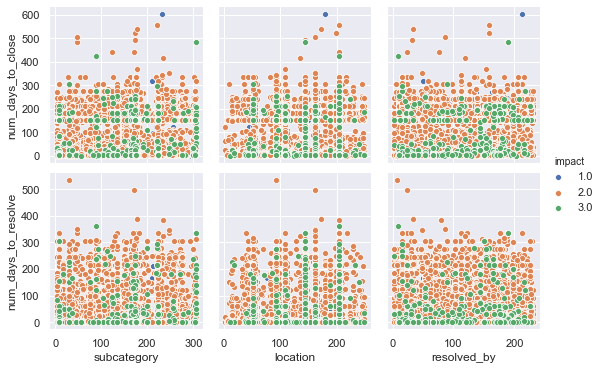

In [44]:
#com o gráfico a seguir, conseguimos perceber que o impacto afeta o tempo para o chamado ser concluido
sns.pairplot(closed_df,
             y_vars=['num_days_to_close', 'num_days_to_resolve'],
             x_vars=['subcategory', 'location', 'resolved_by'],
             dropna=True,
             hue='impact');

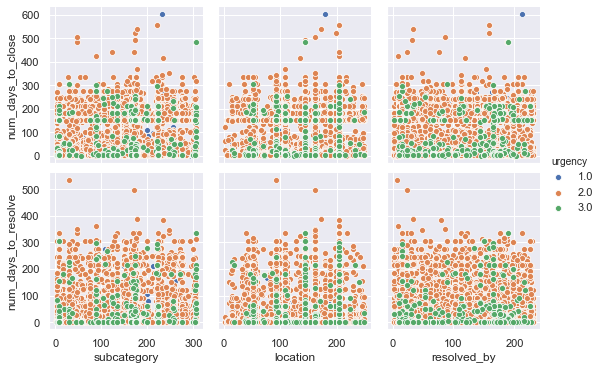

In [45]:
#com o gráfico a seguir, conseguimos perceber que a urgência afeta o tempo para o chamado ser concluido
sns.pairplot(closed_df,
             y_vars=['num_days_to_close', 'num_days_to_resolve'],
             x_vars=['subcategory', 'location', 'resolved_by'],
             dropna=True,
             hue='urgency');

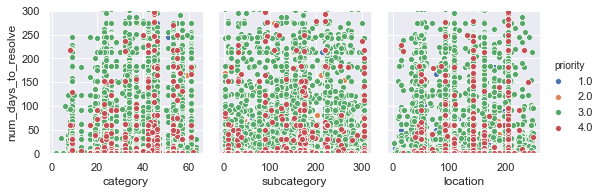

In [46]:
#com o gráfico a seguir, conseguimos perceber que a urgência afeta o tempo para o chamado ser concluido
sns.pairplot(closed_df,
             y_vars=['num_days_to_resolve'],
             x_vars=['category', 'subcategory', 'location'],
             dropna=True,
             hue='priority').set(ylim=(0,300));

In [221]:
closed_gr_df = df[df['incident_state'] == 'Closed'].copy()
closed_gr_df['opened_at'] = pd.to_datetime(closed_gr_df['opened_at'] ).dt.date
closed_gr_df['resolved_at'] = pd.to_datetime(closed_gr_df['resolved_at'] ).dt.date
closed_gr_df['closed_at'] = pd.to_datetime(closed_gr_df['closed_at'] ).dt.date

In [ ]:
open_incidents = []

for row in closed_gr_df.iterrows():
    total = len(closed_gr_df[(closed_gr_df['opened_at'] <= row[1]['opened_at']) & (closed_gr_df['closed_at'] >= row[1]['opened_at'])])
    open_incidents.append(total)
    
closed_gr_df['open_incidents'] = open_incidents   


In [236]:
closed_gr_df.head(1000)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,days_to_close,days_to_resolve,num_days_to_close,num_days_to_resolve,open_incidents
2966,INC0000824,Closed,False,10,0,20,False,1972.0,247.0,2016-01-03,120.0,2016-01-03 16:04:00,908.0,2016-03-24 18:50:00,Phone,229.0,55.0,270.0,426.0,NaN,2.0,2.0,3.0,33.0,159.0,True,False,False,NaN,NaN,NaN,NaN,7.0,143.0,2016-10-03,2016-03-24,81 days 02:50:00,273 days 19:18:00,81.118,2.738e+02,309
2544,INC0000742,Closed,False,0,0,2,True,2508.0,386.0,2016-01-03,NaN,NaT,908.0,2016-06-03 15:00:00,Phone,161.0,32.0,9.0,NaN,NaN,2.0,2.0,3.0,70.0,186.0,True,False,False,NaN,NaN,NaN,NaN,7.0,169.0,2016-01-03,2016-06-03,152 days 01:14:00,0 days 00:14:00,152.051,9.722e-03,309
2541,INC0000741,Closed,False,0,0,12,False,1025.0,228.0,2016-01-03,101.0,2016-01-03 13:48:00,908.0,2016-03-24 18:50:00,Phone,161.0,37.0,135.0,495.0,NaN,2.0,2.0,3.0,49.0,120.0,True,False,False,NaN,NaN,NaN,NaN,6.0,108.0,2016-03-14,2016-03-24,81 days 05:08:00,71 days 01:48:00,81.214,7.108e+01,309
2532,INC0000740,Closed,False,2,0,9,False,4746.0,40.0,2016-01-03,20.0,2016-01-03 13:44:00,908.0,2016-03-24 18:40:00,Phone,204.0,53.0,271.0,NaN,NaN,1.0,2.0,2.0,25.0,57.0,True,False,False,NaN,NaN,NaN,NaN,6.0,53.0,2016-08-03,2016-03-24,81 days 04:59:00,212 days 21:56:00,81.208,2.129e+02,309
2522,INC0000738,Closed,False,0,0,2,True,4414.0,433.0,2016-01-03,190.0,2016-01-03 13:40:00,908.0,2016-06-03 15:00:00,Phone,51.0,45.0,200.0,NaN,NaN,2.0,2.0,3.0,39.0,NaN,True,False,False,NaN,NaN,NaN,NaN,6.0,166.0,2016-01-03,2016-06-03,152 days 01:23:00,0 days 01:12:00,152.058,5.000e-02,309
2519,INC0000735,Closed,False,4,0,9,True,154.0,221.0,2016-01-03,98.0,2016-01-03 13:37:00,908.0,2016-08-03 11:00:00,Phone,108.0,53.0,303.0,4.0,NaN,2.0,2.0,3.0,27.0,34.0,True,False,False,NaN,NaN,NaN,NaN,6.0,33.0,2016-03-03,2016-08-03,212 days 21:27:00,59 days 20:54:00,212.894,5.987e+01,309
2509,INC0000734,Closed,False,1,0,5,True,3518.0,40.0,2016-01-03,20.0,2016-01-03 13:39:00,908.0,2016-08-03 17:00:00,Phone,204.0,8.0,291.0,NaN,NaN,2.0,2.0,3.0,53.0,212.0,True,False,False,NaN,NaN,NaN,NaN,6.0,193.0,2016-03-03,2016-08-03,213 days 03:27:00,60 days 02:30:00,213.144,6.010e+01,309
2503,INC0000733,Closed,False,2,0,11,False,5346.0,55.0,2016-01-03,NaN,NaT,908.0,2016-03-24 18:59:00,Phone,143.0,23.0,75.0,4.0,NaN,2.0,2.0,3.0,70.0,26.0,True,False,False,NaN,NaN,NaN,NaN,9.0,24.0,2016-03-18,2016-03-24,81 days 05:27:00,75 days 05:04:00,81.227,7.521e+01,309
2494,INC0000729,Closed,False,1,0,9,True,360.0,301.0,2016-01-03,129.0,2016-01-03 14:05:00,908.0,2016-08-03 10:00:00,Phone,96.0,45.0,223.0,NaN,NaN,3.0,3.0,4.0,39.0,NaN,True,False,False,NaN,NaN,NaN,NaN,6.0,166.0,2016-03-03,2016-08-03,212 days 20:35:00,59 days 19:38:00,212.858,5.982e+01,309
2484,INC0000728,Closed,False,1,0,3,True,5118.0,221.0,2016-01-03,98.0,2016-01-03 13:27:00,908.0,2016-08-03 12:00:00,Phone,51.0,53.0,303.0,387.0,NaN,3.0,2.0,4.0,30.0,201.0,True,True,False,NaN,NaN,NaN,NaN,6.0,183.0,2016-03-03,2016-08-03,212 days 22:37:00,59 days 22:27:00,212.942,5.994e+01,309


[]

<Figure size 1440x720 with 0 Axes>

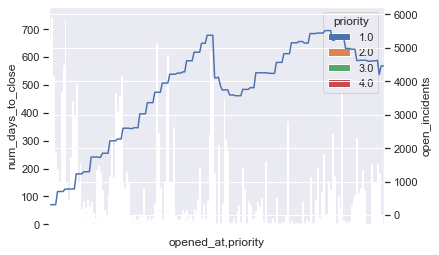

In [307]:
temp = closed_gr_df.sort_values(by=['opened_at']).groupby(by=['opened_at', 'priority']).mean()

plt.figure(figsize=(20,10))
_ = temp['num_days_to_close'].unstack().plot(kind='bar', stacked=True).set_ylabel('num_days_to_close')
_ = temp['open_incidents'].plot(secondary_y=True).set_ylabel('open_incidents')

ax = plt.gca()
ax.set_xticklabels('')

#plt.show()

priority
1.000      13
1.667       1
1.750       1
2.000      19
2.250       2
2.333       3
2.400       1
2.429       1
2.571       1
2.600       3
2.625       1
2.667       9
2.692       1
2.750       5
2.778       3
2.789       1
2.799       1
2.800       4
2.828       1
2.833       4
2.857       1
2.867       1
2.868       1
2.875       2
2.882       1
2.883       1
2.889       2
2.900       4
2.905       2
2.909       2
2.910       1
2.912       1
2.925       1
2.929       1
2.931       1
2.933       1
2.937       1
2.939       1
2.943       1
2.944       1
2.947       1
2.962       1
2.962       1
2.964       1
2.964       1
2.971       1
2.973       1
2.980       1
2.983       1
2.984       1
2.986       1
2.988       1
2.989       1
2.990       1
2.992       1
2.992       1
2.993       1
3.000    1026
3.005       1
3.007       1
3.008       1
3.008       1
3.008       1
3.009       1
3.010       1
3.010       1
3.013       1
3.015       1
3.016       1
3.018       1
3.018      

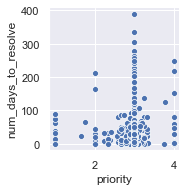

In [48]:


closed_df_goup=closed_df.groupby(by=['category', 'location']).mean()

#[closed_df_goup.priority == 3.5]
closed_df_goup_t = closed_df_goup.loc[(closed_df_goup.priority != 1.5) & (closed_df_goup.priority != 3.5) &(closed_df_goup.priority != 2.5) & (closed_df_goup.priority != 3.5)]

sns.pairplot(closed_df_goup_t,
             y_vars=['num_days_to_resolve'],
             x_vars=['priority'],
             dropna=True)


closed_df_goup_t.groupby('priority').size()


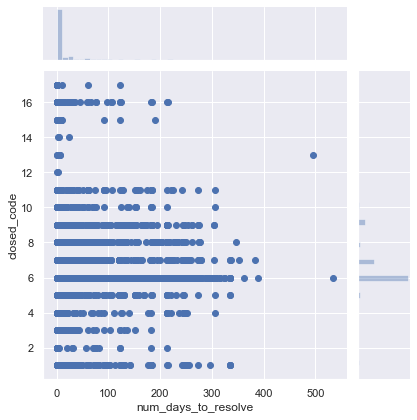

In [49]:
#o tipo de resolução se relaciona com o tempo de conclusão
sns.jointplot(x='num_days_to_resolve',
              y='closed_code', 
              data=closed_df);

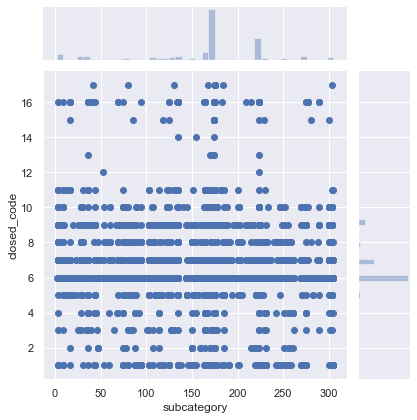

In [50]:
sns.jointplot(x='subcategory',
              y='closed_code', 
              data=closed_df);

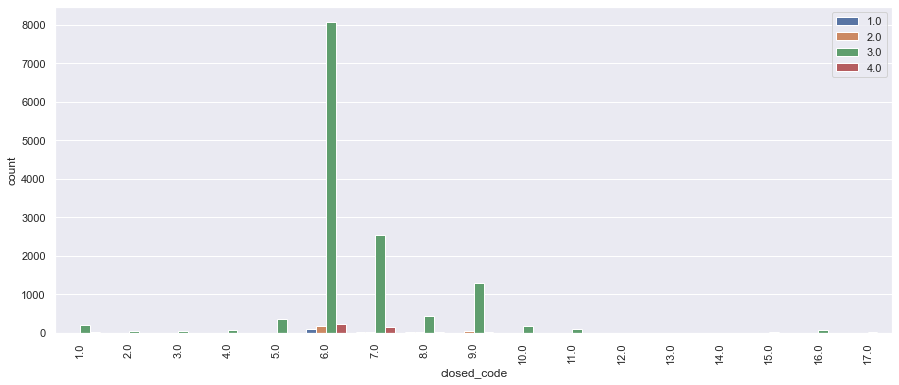

In [51]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='closed_code', hue='priority', data=closed_df);
for item in fig.get_xticklabels():
    item.set_rotation(90)
_ = plt.legend(loc='upper right')